<a href="https://colab.research.google.com/github/dango80/Ames-House-Regression/blob/main/SOAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
df = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [25]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
df = pd.read_csv('/content/drive/MyDrive/Car-mpg- Dataset.csv')

In [36]:
df=df.drop("car_name",axis=1)
df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1
394,44.0,4,97.0,52,2130,24.6,82,2,1
395,32.0,4,135.0,84,2295,11.6,82,1,1
396,28.0,4,120.0,79,2625,18.6,82,1,1


In [45]:
df=df.drop("hp",axis=1)
df

,mpg,cyl,disp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,3504,12.0,70,1,0
1,15.0,8,350.0,3693,11.5,70,1,0
2,18.0,8,318.0,3436,11.0,70,1,0
3,16.0,8,304.0,3433,12.0,70,1,0
4,17.0,8,302.0,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,2790,15.6,82,1,1
394,44.0,4,97.0,2130,24.6,82,2,1
395,32.0,4,135.0,2295,11.6,82,1,1
396,28.0,4,120.0,2625,18.6,82,1,1


In [32]:
df.car_type.unique()

array([0, 1])

In [38]:
y=df.car_type
y

0      0
1      0
2      0
3      0
4      0
      ..
393    1
394    1
395    1
396    1
397    1
Name: car_type, Length: 398, dtype: int64

# Standardizziamo i dati delle variabili

Per rendere omogenei tra le varibili le distanze, rispettando le singole differenze dobbiamo normalizzare i dati standardizzando i valori rispetto ai parametri descrittivi di ciascuna variabile.

Per fare questo utilizziamo una funzione di Scikit learn chiamata StandardScaler, creaiamo un'istanza e gli facciamo analizzare i dati tramite il metodo .fit()

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop("car_type",axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [52]:
variabili_st = scaler.transform(df.drop('car_type',axis=1))

In [54]:
df_norm = pd.DataFrame(variabili_st, columns=df.columns[:-1])
df_norm.head()

,mpg,cyl,disp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.565841,-1.840117,-1.627426,-0.715145


In [55]:
df_norm.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,2.761610e-16,-5.171742e-16,-8.312725e-17,-9.902743e-17,8.982206e-17,-8.837152e-16,-4.781212e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.859374e+00,-1.444949e+00,-1.204411e+00,-1.604943e+00,-2.747814e+00,-1.627426e+00,-7.151448e-01
25%,-7.704907e-01,-8.563206e-01,-8.563178e-01,-8.828266e-01,-6.328794e-01,-8.150739e-01,-7.151448e-01
50%,-6.591883e-02,-8.563206e-01,-4.314040e-01,-1.973624e-01,-2.472221e-02,-2.721449e-03,-7.151448e-01
75%,7.027050e-01,1.498191e+00,6.584879e-01,7.538337e-01,5.834349e-01,8.096310e-01,5.332220e-01
max,2.957335e+00,1.498191e+00,2.511784e+00,2.565185e+00,3.351912e+00,1.621983e+00,1.781589e+00


In [56]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(variabili_st, y, test_size=0.30, random_state=101)
X_train

array([[-1.2188546 ,  1.49819126,  1.19623199, ..., -0.93241945,
        -1.35664215, -0.71514478],
       [ 0.19028912, -0.85632057, -0.77229532, ..., -0.56934055,
        -1.35664215,  1.78158875],
       [ 0.94610257, -0.85632057, -0.8491159 , ..., -0.3878011 ,
         0.53884683, -0.71514478],
       ...,
       [ 1.13825853, -0.85632057, -0.82991075, ...,  0.51989614,
         1.08041511,  1.78158875],
       [-1.2188546 ,  1.49819126,  1.40748858, ..., -2.74781393,
        -1.62742629, -0.71514478],
       [ 1.39446648, -0.85632057, -0.9163339 , ...,  0.22943302,
         1.35119925, -0.71514478]])

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
MyKnn = KNeighborsClassifier(n_neighbors=3)

In [62]:
MyKnn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [63]:
MyKnn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [66]:
pred = MyKnn.predict(X_test)

In [64]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
print(confusion_matrix(y_test,pred))

[[61  1]
 [ 0 58]]


In [68]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       0.98      1.00      0.99        58

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [69]:
errore = []

# Facciamo un ciclo tante volte
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    errore.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Errore')

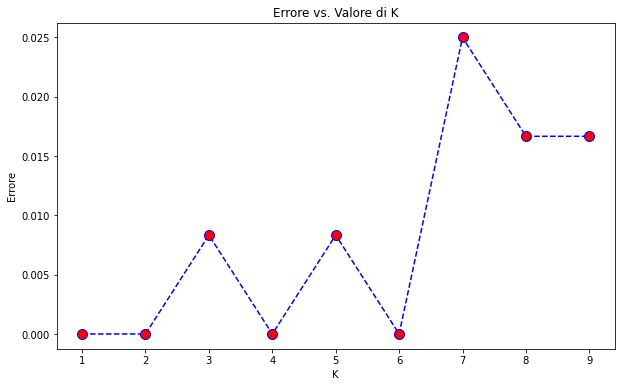

In [71]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),errore, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Errore vs. Valore di K')
plt.xlabel('K')
plt.ylabel('Errore')

In [72]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('Valore di K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Valore di K=30


[[62  0]
 [ 0 58]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        58

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

